In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
import nltk

In [82]:
set = pd.read_csv(f"../AI seminar/dataset/1.csv", encoding= 'unicode_escape')
set.head()

,name,rating,comments,date_of_experience
0,D And,5 reviews,I booked a car for a destination but had a 16 ...,18-Dec-22
1,smart boy,1 review,I have to ask why company select like this peo...,1-Jan-23
2,Tom,1 review,My Bolt driver demanded cash from us for the l...,1-Jan-23
3,Maria M,1 review,The drive took me to another address and did n...,30-Dec-22
4,Luke Thurston,2 reviews,Charged me double!\n\nAwful company took my gi...,28-Dec-22


In [83]:
set.isnull().sum()

name                  0
rating                0
comments              0
date_of_experience    0
dtype: int64

<AxesSubplot:>

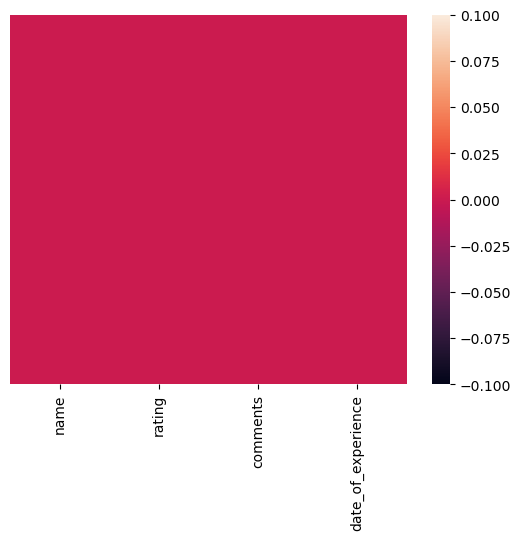

In [84]:
sns.heatmap(set.isnull(), yticklabels=False)

In [85]:
set.dropna()

,name,rating,comments,date_of_experience
0,D And,5 reviews,I booked a car for a destination but had a 16 ...,18-Dec-22
1,smart boy,1 review,I have to ask why company select like this peo...,1-Jan-23
2,Tom,1 review,My Bolt driver demanded cash from us for the l...,1-Jan-23
3,Maria M,1 review,The drive took me to another address and did n...,30-Dec-22
4,Luke Thurston,2 reviews,Charged me double!\n\nAwful company took my gi...,28-Dec-22
5,Rohit Pradeep,1 review,The price for the trip was £115 while I was tr...,1-Jan-23
6,Manjinder Rai,3 reviews,The worst driver and the worst customer servic...,27-Dec-22
7,Salman Kaleem,3 reviews,My wife booked a ride from st Marty's hospital...,28-Dec-22
8,Andrew Mcloughlin,1 review,Absolute waste of time booked on the App in Bi...,28-Dec-22
9,Emma,1 review,Scam! The driver asked me to cancel the ride a...,9-Dec-22


In [ ]:
set.describe()

,name,rating,comments,date_of_experience
count,20,20,20,20
unique,20,8,20,14
top,D And,1 review,I booked a car for a destination but had a 16 ...,28-Dec-22
freq,1,8,1,4


In [ ]:
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\kachi\AppData\Roaming\nltk_data...


In [ ]:
reviews = set['comments']

In [ ]:
sia = SentimentIntensityAnalyzer()
sentiments = []
for review in reviews:
    sentiment = sia.polarity_scores(review)
    sentiments.append(sentiment)

In [ ]:
set_sentiments = pd.DataFrame(sentiments)

In [ ]:
positive_count = set_sentiments[set_sentiments['compound'] > 0.5].shape[0]
negative_count = set_sentiments[set_sentiments['compound'] < -0.5].shape[0]
neutral_count = set_sentiments[(set_sentiments['compound'] >= -0.5) & (set_sentiments['compound'] <= 0.5)].shape[0]

In [ ]:
print("Positive reviews:", positive_count)
print("Negative reviews:", negative_count)
print("Neutral reviews:", neutral_count)

Positive reviews: 2
Negative reviews: 12
Neutral reviews: 6
